# Lectura de datos

In [1]:
b = open('../../../data/cien.txt','r', encoding="utf8")
text = b.read()

## Preprocesamiento para organizar texto

In [2]:
import re

In [3]:
text = text.split('www.lectulandia.com - Página 12\n')[1].split('www.lectulandia.com - Página 289')[0]

In [4]:
text = re.sub('(\s?www.lectulandia.com - Página \d*)','',text)
text = re.sub('\n',' ',text)

In [5]:
text = re.split('\x0c[A-Z]\s',text)
texto = [re.sub("\s\s+" , " ", capi) for capi in text]

## Datos para trabajar

In [6]:
capitulos = texto[1:]
text = ''.join(capitulos)

In [7]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string
from nltk.util import ngrams
from collections import Counter
from matplotlib import font_manager as fm, rcParams

In [8]:
palabrasparar = ['entonces',
                'tan',
                'sino',
                'mientras',
                'dijo',
                'mismo',
                'después',
                'dos',
                'dio']

In [9]:
stop_words1 = stopwords.words('spanish')
stop_words1.extend(palabrasparar)
stop_words = set(stop_words1)
tokenizer=RegexpTokenizer("['\w]+")

# Funciones

### Texto

In [10]:
def palabras_texto(input_text):
    # Quitarle los signos de puntuacion
    text = "".join([word for word in input_text if word not in string.punctuation])
    # 
    tokens = tokenizer.tokenize(text)
    # Selecciona de las palabras las que no estan en las stop words
    words = [word for word in tokens if word.lower() not in stop_words]
    # Lo vuelve dict
    vocabulary = set(words)
    #print('The vocabulary size is: ',len(vocabulary))
    #print('The number of words that have been removed is {} which is {:.2f}% of total words'.format(len(tokens)-len(words),len(words)/len(tokens)*100))
    unigrams = list(ngrams(words, 1))
    freq = Counter(unigrams)
    topN= freq.most_common(400)
    wordscount = {w[0]:f for w, f in topN} 
    return wordscount, vocabulary

### Nube de palabras

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
import numpy as np
from PIL import Image

In [12]:
def white_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb(66, 70, 48)" 

In [13]:
def hacer_nube(words_list):
    glasses_mask = np.array(Image.open("../../../data/mariposa1.PNG"))
    wordcloud = WordCloud(font_path = '../../../styles/Florsn01.ttf', background_color="rgba(66, 70, 48, 0)", mode="RGBA",mask=glasses_mask, width=1000, height=1500,)
    wordcloud.fit_words(wordscount)
    wordcloud.recolor(color_func=white_color_func, random_state=3)
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.savefig('100_mariposa.png',bbox_inches='tight', transparent="True", pad_inches = 0)
    plt.show()

### Gráfico de violin

In [14]:
def hacer_violin(names, tokens):
    fig, axs = plt.subplots(len(names), sharex=True, figsize=(15,10))
    prop = fm.FontProperties(fname='../../../styles/Florsn01.ttf', size=35)
    for i, n in enumerate(names):
        indices = [i for i, x in enumerate(tokens) if x == n]
        df = pd.DataFrame(indices,columns=[n])
        #display(df)
        sns.violinplot(x=n, data=df, bw=0.05, ax=axs[i], color='#fdb550', inner=None)

    for ax in axs:
        ax.set_xlim([-7000, len(tokens)+7000])
        lab = ax.get_xlabel()
        ax.set_xlabel("", fontsize=20)
        ax.set_ylabel(lab, fontsize=20, rotation=0, horizontalalignment='right', verticalalignment="center", color='#fdb550', fontproperties=prop)
        ax.grid(False)
        ax.yaxis.grid(True)
        ax.set(frame_on=False)  # New

        # Hide major tick labels
        ax.xaxis.set_major_formatter(ticker.NullFormatter())
        
        ax.tick_params(axis='both', which='both', length=0)
        
        # Customize minor tick labels
        #ax.xaxis.set_minor_locator(ticker.FixedLocator(np.arange(0.5,19,0.5)))
        #ax.xaxis.set_minor_formatter(ticker.FixedFormatter(apariciones.index))
        
        

    plt.savefig(f'apariciones.png',bbox_inches='tight', transparent="True", pad_inches = 0)
    plt.show()


# Inicio

## Texto entero

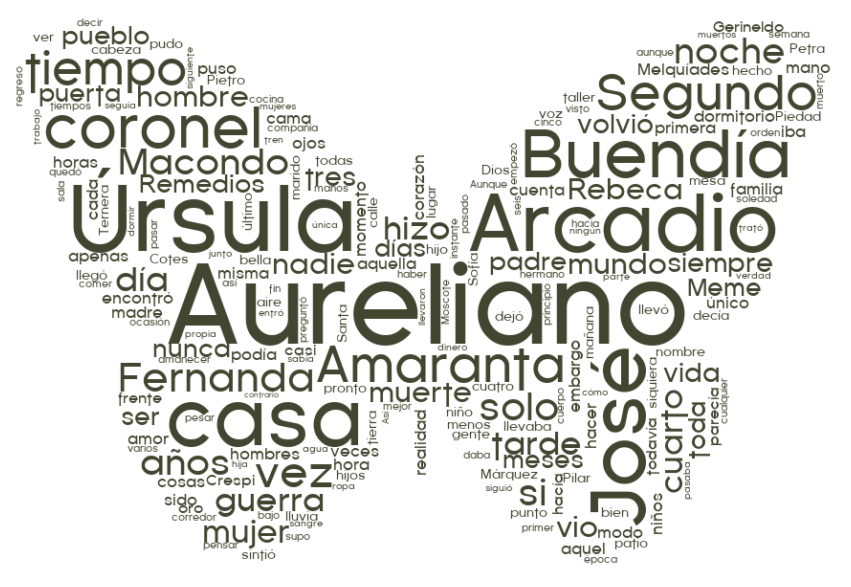

In [15]:
wordscount, vocabulary = palabras_texto(text)
hacer_nube(wordscount)

## Por capitulos

In [16]:
import pandas as pd

In [17]:
conteo_capitulos = []
for cap in capitulos:
    wordscount = palabras_texto(cap)
    conteo_capitulos.append(wordscount)

In [18]:
conteo_capitulos

[({'Buendía': 40,
   'José': 39,
   'Arcadio': 39,
   'Úrsula': 25,
   'Melquíades': 23,
   'aldea': 15,
   'niños': 15,
   'tiempo': 14,
   'años': 13,
   'Macondo': 13,
   'gitanos': 13,
   'casa': 13,
   'vez': 12,
   'aquella': 11,
   'mundo': 11,
   'cosas': 9,
   'gitano': 9,
   'vida': 9,
   'siempre': 9,
   'hombres': 9,
   'Aureliano': 8,
   'padre': 8,
   'oro': 8,
   'tierra': 8,
   'hombre': 8,
   'aquel': 8,
   'mujer': 8,
   'varios': 8,
   'todas': 8,
   'mano': 8,
   'toda': 8,
   'solo': 8,
   'punto': 7,
   'dejó': 7,
   'volvió': 7,
   'mar': 7,
   'tarde': 6,
   'grande': 6,
   'hizo': 6,
   'imaginación': 6,
   'lugar': 6,
   'cuartito': 6,
   'hacia': 6,
   'laboratorio': 6,
   'parecía': 6,
   'ser': 6,
   'momento': 6,
   'conocer': 5,
   'río': 5,
   'pronto': 5,
   'meses': 5,
   'región': 5,
   'fondo': 5,
   'partes': 5,
   'lupa': 5,
   'reales': 5,
   'parte': 5,
   'sierra': 5,
   'ruta': 5,
   'nadie': 5,
   'días': 5,
   'cabeza': 5,
   'llevó': 4,
   '

## Gráfico de violin

In [19]:
nombres_personajes = ['Aureliano', 'Buendía', 'José', 'Arcadio', 'Úrsula', 'Melquíades', 'Macondo', 'hielo', 'muerte', 'cola de cerdo','tren','mariposas','fusilamiento']

In [20]:
'''
list_aux = []
for cap in conteo_capitulos:
    dict_nom = {}
    for nom in nombres_personajes:
        if not nom in cap:
            cap[nom] = 0
        dict_nom[nom] = cap[nom]
    list_aux.append(dict_nom)

df_apariciones = pd.DataFrame(list_aux)
'''

'\nlist_aux = []\nfor cap in conteo_capitulos:\n    dict_nom = {}\n    for nom in nombres_personajes:\n        if not nom in cap:\n            cap[nom] = 0\n        dict_nom[nom] = cap[nom]\n    list_aux.append(dict_nom)\n\ndf_apariciones = pd.DataFrame(list_aux)\n'

In [21]:
#df_apariciones

In [22]:
import seaborn as sns
import matplotlib.ticker as ticker

In [23]:
palabras = "".join([word for word in text if word not in string.punctuation])
tokens = tokenizer.tokenize(palabras)

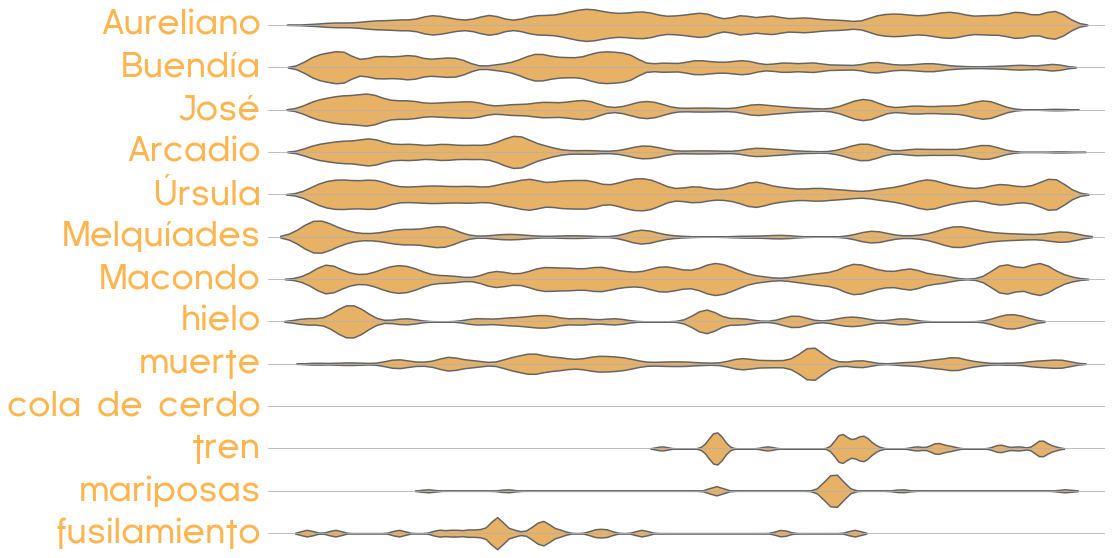

In [24]:
hacer_violin(nombres_personajes, tokens)

In [25]:
text

' uchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señalarlas con el dedo. Todos los años, por el mes de marzo, una familia de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos. Primero llevaron el imán. Un gitano corpulento, de barba montaraz y manos de gorrión, que se presentó con el nombre de Melquíades, hizo una truculenta demostración pública de lo que él mismo llamaba la octava maravilla de los sabios alquimistas de Macedonia. Fue de casa en casa arrastrando dos lingote